<a href="https://colab.research.google.com/github/Andrey239/ML_LPI_2021/blob/main/seminar03/MLatFIAN2021_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [4]:
from sklearn.model_selection import cross_validate

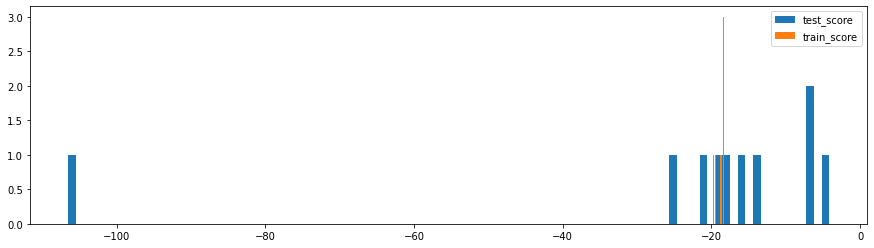

In [6]:
numi = 10
scores10 = cross_validate(model,X, y,cv = numi,scoring=('neg_mean_squared_error'),return_train_score=True)
#print('Cross-validation scores:{}'.format(scores10))
#scores100 = cross_validate(model,X, y,cv = 100,return_train_score=True)
plt.figure(figsize=(15, 4))
#axis = np.linspace(0, numi, numi)



plt.hist(scores10['test_score'], bins = 100,label='test_score')
plt.hist(scores10['train_score'],bins = 100, label='train_score')
plt.legend()



Мне кажется это какой-то неправильный график. Сделаю более разумный

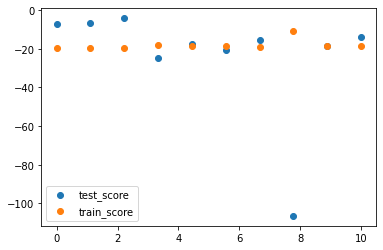

In [7]:
axis = np.linspace(0, numi, numi)
plt.scatter(axis,scores10['test_score'], label='test_score')
plt.scatter(axis,scores10['train_score'], label='train_score')
plt.legend()

In [ ]:
Так-то лучше. Повторим

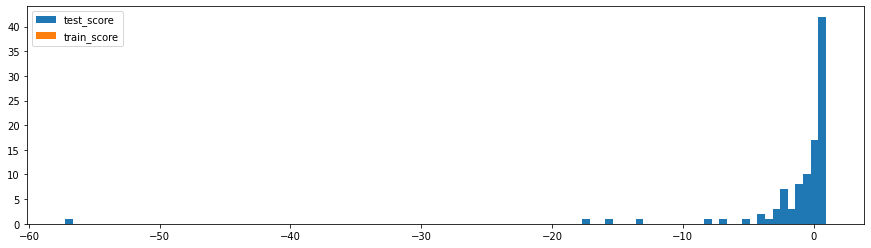

In [8]:
numi = 100

#print('Cross-validation scores:{}'.format(scores10))
scores100 = cross_validate(model,X, y,cv = 100,return_train_score=True)
plt.figure(figsize=(15, 4))
#axis = np.linspace(0, numi, numi)



plt.hist(scores100['test_score'], bins = 100,label='test_score')
plt.hist(scores100['train_score'],bins = 100, label='train_score')
plt.legend()



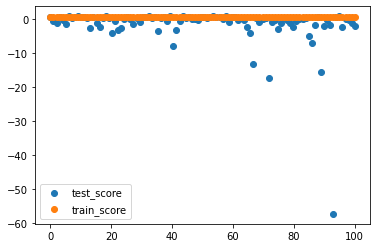

In [9]:
axis = np.linspace(0, numi, numi)
plt.scatter(axis,scores100['test_score'], label='test_score')
plt.scatter(axis,scores100['train_score'], label='train_score')
plt.legend()